In [2]:
df1 = pd.read_csv('10_Data.csv', encoding='cp949')
df1

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,3,C001,쿠커 #1,2011-01-03,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37
1,1,C002,쿠커 #2,2011-01-03,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83
2,13,C003,쿠커 #3,2011-01-03,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55
3,7,C005,2동 쿠커 #4,2011-01-03,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81
4,2,C007,프리머 #1,2011-01-03,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24064,1,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,72.136538,117.336538,152.813288,23.651,203.823,71.54
24065,2,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,71.874219,106.174219,141.470619,23.531,207.574,76.03
24066,3,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,72.942705,119.742705,155.733955,23.994,210.006,74.50
24067,4,D088,냉동밥 내포장#1,2021-10-29,1BA03606,콩콩푸드밥3kg,W005,70.664452,65.764452,100.773102,23.339,209.513,72.12


### scaling

In [3]:
df1.isnull().sum()

순번           0
생산라인코드       0
생산라인명        0
생산일자         0
품목코드        38
품목명         57
작업장코드        0
충전실온도        0
실링온도        28
쿠킹온도        28
쿠킹스팀압력       0
실링압력         0
생산시간      1078
dtype: int64

In [4]:
# 결측치 제거
df1_clean = df1.dropna()
df1_clean.shape

(22909, 13)

In [5]:
numeric_list = df1_clean.describe().columns.tolist()
numeric_list
df1_numeric = df1_clean[numeric_list]

In [6]:
# scaler & encoding Import 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [7]:
df1_numeric.describe()

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
count,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000
mean,8.573486,71.685658,101.377923,136.969046,23.727427,208.354819,75.685222
std,7.377341,0.857357,12.486747,12.480757,0.232014,3.622778,2.695066
min,1.000000,68.217193,65.050311,100.058961,22.919000,194.239000,69.690000
25%,3.000000,71.181829,91.825021,127.329544,23.581000,205.912000,73.420000
50%,6.000000,71.728887,99.786348,135.491005,23.728000,208.361000,75.670000
75%,12.000000,72.251039,109.162083,144.771468,23.864000,210.788000,77.950000
max,62.000000,74.086660,140.799501,176.823600,24.580000,223.702000,82.580000


In [8]:
# 스케일링 실시

scaler = StandardScaler()
scaler.fit(df1_numeric) # fir = data를 변환하기 위한 수식을 도출

StandardScaler()

(array([  42.,  200.,  590., 1410., 3256., 6073., 6261., 3478., 1350.,
         249.]),
 array([-4.04561912, -3.3610042 , -2.67638927, -1.99177434, -1.30715941,
        -0.62254449,  0.06207044,  0.74668537,  1.4313003 ,  2.11591522,
         2.80053015]),
 <BarContainer object of 10 artists>)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


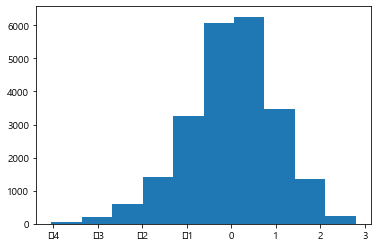

In [9]:
df1_scale = pd.DataFrame(scaler.fit_transform(df1_numeric), columns =numeric_list )
df1_scale.describe()

plt.hist(df1_scale['충전실온도'])

In [10]:
df1.describe()

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
count,24069.000000,24069.000000,24041.000000,24041.000000,24069.000000,24069.000000,22991.000000
mean,8.558935,71.660889,101.371487,136.915936,23.696775,208.096644,75.684847
std,7.342642,0.875654,12.529530,12.524551,0.269567,3.809777,2.695426
min,1.000000,68.217193,65.050311,100.058961,22.715000,192.237000,69.690000
25%,3.000000,71.147884,91.829723,127.348389,23.541000,205.595000,73.420000
50%,6.000000,71.711676,99.914221,135.607597,23.720000,208.174000,75.670000
75%,12.000000,72.238755,109.170700,144.727243,23.853000,210.665000,77.960000
max,62.000000,74.086660,140.799501,176.823600,24.580000,223.702000,82.580000


In [11]:
#표준정규분포로 변환하여
#결과에서 충전실 온도가 0 이하인 데이터 갯수확인

print(len(df1_scale.loc[df1_scale['충전실온도'] < 0]['충전실온도']))

10943


In [12]:
df1_scale.loc[df1_scale['충전실온도'] < 0]['충전실온도'].shape[0]

10943

## MinMaxScaler

In [13]:
# 스케일링 실시

scaler = MinMaxScaler()
scaler.fit(df1_numeric) # fir = data를 변환하기 위한 수식을 도출

df1_scale = pd.DataFrame(scaler.fit_transform(df1_numeric), columns =numeric_list )
df1_scale.describe()

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
count,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000
mean,0.124156,0.590934,0.479578,0.480821,0.486711,0.479103,0.465106
std,0.120940,0.146071,0.164843,0.162585,0.139684,0.122960,0.209082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032787,0.505095,0.353465,0.355249,0.398555,0.396192,0.289372
50%,0.081967,0.598299,0.458566,0.461567,0.487056,0.479313,0.463926
75%,0.180328,0.687259,0.582340,0.582462,0.568934,0.561688,0.640807
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [15]:
number_list = list(range(0, 57))

In [16]:
object_list = df1.describe(include='object').columns.to_list()
object_list

['생산라인코드', '생산라인명', '생산일자', '품목코드', '품목명', '작업장코드']

In [17]:
dict_transform = dict(zip(object_list, number_list))
dict_transform

{'생산라인코드': 0, '생산라인명': 1, '생산일자': 2, '품목코드': 3, '품목명': 4, '작업장코드': 5}

In [18]:
df1_clean['생산라인명'].replace(dict_transform)

0            쿠커 #1
1            쿠커 #2
2            쿠커 #3
3         2동 쿠커 #4
4           프리머 #1
           ...    
24059    냉동밥 내포장#2
24062    냉동밥 내포장#1
24063    냉동밥 내포장#1
24067    냉동밥 내포장#1
24068    파우치포장(#3)
Name: 생산라인명, Length: 22909, dtype: object

In [19]:
# Sklearn 라이브러리로 변환

encoder = LabelEncoder()
encoder.fit(df1_clean['생산라인명'])
pd.DataFrame(encoder.fit_transform(df1_clean['생산라인명']), columns=['생산라인명'])

,생산라인명
0,41
1,42
2,43
3,11
4,55
...,...
22904,24
22905,23
22906,23
22907,23


In [20]:
pd.get_dummies(df1_clean)

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산라인코드_C001,생산라인코드_C002,생산라인코드_C003,...,품목명_흑참깨드레싱E,품목명_흑참깨드레싱E(재),품목명_흑초차베이스,품목명_흑초차베이스(재),품목명_흰쌀베이스밥,작업장코드_W002,작업장코드_W003,작업장코드_W005,작업장코드_W007,작업장코드_W012
0,3,71.669853,96.769853,131.742003,23.315,201.844,70.37,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,70.386480,102.086480,136.926080,23.226,212.043,70.83,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,13,71.206130,112.306130,147.579680,23.516,208.781,73.55,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,7,70.430565,96.030565,131.569165,23.692,208.269,74.81,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,72.179319,114.079318,149.928068,23.899,211.625,73.40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24059,3,71.288798,102.688798,138.091898,23.602,206.561,72.49,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24062,9,69.732381,98.432381,133.916831,23.656,213.413,76.63,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24063,10,71.459932,107.559932,143.598182,24.026,215.243,81.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24067,4,70.664452,65.764452,100.773102,23.339,209.513,72.12,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
from sklearn.impute import SimpleImputer


In [22]:
df1.isnull().sum()

순번           0
생산라인코드       0
생산라인명        0
생산일자         0
품목코드        38
품목명         57
작업장코드        0
충전실온도        0
실링온도        28
쿠킹온도        28
쿠킹스팀압력       0
실링압력         0
생산시간      1078
dtype: int64

In [23]:
imputer = SimpleImputer(strategy ='median') # 평균대치
imputer.fit(df1[['생산시간', '실링온도', '쿠킹온도']])

SimpleImputer(strategy='median')

In [24]:
df1_clean2 = pd.DataFrame(imputer.fit_transform(df1[['생산시간', '실링온도', '쿠킹온도']])
                          , columns=['생산시간', '실링온도', '쿠킹온도'])
df1_clean2.isnull().sum()

생산시간    0
실링온도    0
쿠킹온도    0
dtype: int64

help(SimpleImputer)

## 특성공학 + 학습

In [25]:
df1 = pd.read_csv('./01_Data.csv')
df1.head(2)

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드


In [26]:
df1['State'].value_counts()

계약확정     50620
해약확정       622
기간만료        45
해약진행중       14
Name: State, dtype: int64

In [27]:
df1['State'].value_counts()

계약확정     50620
해약확정       622
기간만료        45
해약진행중       14
Name: State, dtype: int64

In [28]:
# df1['Target'] = df1['State'].replace({'계약확정' : 0, '기간만료': 0,
#                      '해약확정:':1, '해약진행중':1})

df1['Target'] = df1['State'].replace({'계약확정' : 0, '기간만료' : 0, '해약확정' : 1, '해약진행중' : 1})

In [29]:
df1.head()

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Target
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,0
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,0
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,0
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,0
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,0


In [30]:
df1['Target'].value_counts()

0    50665
1      636
Name: Target, dtype: int64

In [31]:
df1.columns

Index(['Index', 'Member_ID', 'Sales_Type', 'Contract_Type', 'Channel',
       'Datetime', 'Term', 'Payment_Type', 'Product_Type', 'Amount_Month',
       'Customer_Type', 'Age', 'Address1', 'Address2', 'State',
       'Overdue_count', 'Overdue_Type', 'Gender', 'Credit_Rank', 'Bank',
       'Target'],
      dtype='object')

In [32]:
X = df1[['Sales_Type', 'Channel', 'Term', 'Amount_Month', 'Age', 'Credit_Rank']]
Y = df1['Target']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1234, test_size=0.3)

In [35]:
print(f'사이즈의 크기 : {X_train.shape}')
print(f'사이즈의 크기 : {X_test.shape}')
print(f'사이즈의 크기 : {Y_train.shape}')
print(f'사이즈의 크기 : {Y_test.shape}')


사이즈의 크기 : (35910, 6)
사이즈의 크기 : (15391, 6)
사이즈의 크기 : (35910,)
사이즈의 크기 : (15391,)


In [36]:
# 학습알고리즘 호출


In [37]:
# model = DecisionTreeClassifier()
# model.fit(X_train, Y_train)

In [38]:
### 파이프라인 구축(특성공학 + 학습)
from sklearn.pipeline import make_pipeline
### 결측치처리 , 스케일링과 인코딩 (숫자는 - 중앙값 / 문자 - 최빈값 변경)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# 숫자는 숫자끼리 문자는 문자끼리 처리가 될 수 있도록 파이프를 별도로 구성
# 두파이프를 병합하는 형태
# from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_transformer


### 학습알고리즘 호출
from sklearn.tree import DecisionTreeClassifier


In [39]:
# 숫자가 처리되는 process 구축 (중앙값을 결측 처리 -> 2. 스케일링 수행)
numeric_pipe = make_pipeline(SimpleImputer(strategy='median'),
                            MinMaxScaler())
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler())])

In [40]:
# 문자가 처리되는 process 구축 (1. 최빈값으로 결측 처리 -> 2. 인코딩)
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder())
category_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder())])

In [41]:
#  숫자는 숫자끼리 문자는 문자끼리 처리가 디도록 파이프를 구성
numeric_list = X.describe().columns.tolist() # describe는 integer data만 나오기때문에 column을 따로뽑을수있다.
numeric_list
category_list = X.describe(include = 'object').columns.tolist() # 문자데이터만 뽑기
category_list

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                             (category_pipe,category_list))
preprocessing_pipe

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Term', 'Amount_Month', 'Age',
                                  'Credit_Rank']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Sales_Type', 'Channel'])])

In [42]:
# 특성공학 + 학습

model_pipe = make_pipeline( preprocessing_pipe, DecisionTreeClassifier())


In [43]:
X_train

,Sales_Type,Channel,Term,Amount_Month,Age,Credit_Rank
4142,멤버십,재계약,12,66900,33.0,5.0
18830,렌탈,영업방판,60,87900,86.0,NaN
9676,렌탈,홈쇼핑/방송,60,96900,47.0,1.0
35734,렌탈,홈쇼핑/방송,60,96900,48.0,2.0
38283,렌탈,대형마트A,60,96900,47.0,3.0
...,...,...,...,...,...,...
32399,렌탈,영업방판,60,81900,50.0,3.0
17048,렌탈,대형마트E,60,105900,51.0,3.0
23924,렌탈,영업방판,36,102900,49.0,NaN
34086,렌탈,전문매장H,60,96900,26.0,5.0


In [44]:
Y_train.value_counts()

0    35455
1      455
Name: Target, dtype: int64

In [45]:
model_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Term', 'Amount_Month',
                                                   'Age', 'Credit_Rank']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Sales_Type', 'Channel'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [46]:
# 평가 
from sklearn.metrics import classification_report


In [47]:
Y_train_pred = model_pipe.predict(X_train)
Y_test_pred = model_pipe.predict(X_test)

In [48]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35455
           1       0.96      0.18      0.30       455

    accuracy                           0.99     35910
   macro avg       0.98      0.59      0.65     35910
weighted avg       0.99      0.99      0.99     35910



In [49]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15210
           1       0.07      0.02      0.03       181

    accuracy                           0.99     15391
   macro avg       0.53      0.51      0.51     15391
weighted avg       0.98      0.99      0.98     15391



## x1 = input('계약 유형을 입력하시오. : ')
x2 = input('유입 경로을 입력하시오. : ')
x3 = input('계약 기간을 입력하시오. : ')
x4 = input('월 납부액을 입력하시오. : ')
x5 = input('고객의 연력을 입력하시오. : ')
x6 = input('신용 등급 입력하시오. : ')

input_data = pd.DataFrame([[x1,x2,x3,x4,x5,x6]], columns = X.columns.to_list())

In [51]:
model_pipe.predict(input_data)

ValueError: Found unknown categories ['2'] in column 0 during transform

In [52]:
# 모델 저장
import pickle # python 객체들을 하나의 파일로 변환

In [53]:
pickle.dump(model_pipe, open('./model.sav', 'wb'))

In [54]:
X.columns.to_list()

['Sales_Type', 'Channel', 'Term', 'Amount_Month', 'Age', 'Credit_Rank']

In [55]:
# GridSearchCV : 하이퍼 파라미터 튜닝
# cv (cross validation)




In [56]:
grid_model = GridSearchCV(model_pipe, cv=5, 
            param_grid = {'decisiontreeclassifier__max_depth':range(1,11),
                           'decisiontreeclassifier__min_samples_leaf':range(1,11)}, 
                        scoring='f1',
                        n_jobs = -1)
grid_model.fit(X_train,Y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Term',
                                                                          'Amount_Month',
                                                                          'Age',
                                                                          'Credit_Rank']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Sales_Type',
                                                                          'Channel'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': range(1, 11),
                         'decisiontreeclassifier__min_samples_leaf': range(1, 11)},
             scoring='f1')

In [57]:
best_model = grid_model.best_estimator_

In [58]:
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Term', 'Amount_Month',
                                                   'Age', 'Credit_Rank']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Sales_Type', 'Channel'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=9))])

In [59]:
pickle.dump(best_model, open('./best_model.sav', 'wb'))

# Mission 8.

- 01_Data.csv 파일을 가져와 df으로 선언한 뒤, 아래의 문제를 해결하시오.


In [60]:
df1 = pd.read_csv('./01_Data.csv')
df1.head(2)

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드


In [61]:
df1['Total_Amount'] = df1['Amount_Month'] * df1['Term']
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,5814000
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,802800
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,802800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행,5814000
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고,5814000
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드,4715100
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드,5814000


In [62]:
df1['Member_ID'].value_counts()

25777820    187
25869517     45
25733179     38
25722644     34
25863590     28
           ... 
66771705      1
66150388      1
66771536      1
66430740      1
66799607      1
Name: Member_ID, Length: 43638, dtype: int64

# Mission 8

- 01_Data.csv 파일을 가져와 df1으로 선언한 뒤 아래의 문제를 해결하시오.

1. 'Amount_Month'(월렌탈비용)과 'Term'(계약기간)데이터를 곱하여, 계약기간동안 한명의 회원이 총 납부하는 총 금액
    ('Total_Amount')항목을 계산하여 새로운 변수로 선언
2. 총금액('Total_Amount')값에 따라 고객의 등급을 분류해보고자 한다.
    총금액('Total_Amount')값이 상위 10% 고객은 'VIP'
    총금액('Total_Amount')값이 상위 30% 고객은 'special'
    나머지 고객 'Normal' 값으로 계산하여 'Member_Rank'변수를 생성
3. 앞서 계산된 'Member_Rank'에서 'VIP'고객들의 특성을 파악하고 한다.
    'VIP'고객들만 추출하여, 'Channel'(유입경로)에 따른 'Total_Amount'(총금액)의 평균을 시각화 / 합 시각화
4. 'VIP'고객들의 'Channel'(유입경로)에서 Total_Amount 값의 합이 가장 높은 상위 3개의 경로를 선택하여,
    각 경로별 Total_Amount 값의 평균의 유의미한 차이가 있는지 가설검정 수행
5. 'Member_Rank'고객의 등급에 따라 사용하는 'Product_Type'제품군이 달라지는지 확인해 보고자 한다.
    - 고객의 등급과 제품군의 빈도수를 나타나는 그래프를 시각화
    - 고객의 등급과 제품군 간의 연관성이 있는지 가설검정을 수행
6. 'Member_Rank'고객 등급에서 'Special'고객들의 특성을 파악하고자 한다.
    - 'Datetime'계약일자를 이용하여, 가장 유입이(빈도수) 많이 발생한 '월'을 확인
    - 2019년도 / 2020년도 각각 확인
7. 'Product_Type'제품군 별 연도에 따른 'Total_Amount'총금액의 증감율을 계산하시오.
8. Credit_Rank '신용등급'을 예측하는 회귀모델을 만들고자 한다.
    아래의 조건을 맞춰 회귀모델을 구성하시오.
        - X : Age / Amount_Month/ Term / Gender / Product_Type
        - Y : Credit_Rank
        - 숫자 데이터 : 결측처리 + Standard Scaling
        - 문자 데이터 : 결측처리 + One Hot Encoding
        - 교차 검증 3회 / DecisionTreeRegressor / param_grid ={}
        - r2_score(from sklearn.metrics import r2_score)
        - r2_socre(Y_train, Y_train_pred_ / r2_score(Y_test, Y_test_pred)
9. 'Product_Type' 별 계약건수 대비 총금액(Total_Amount)을 나눈 값을 계산하시오.


In [63]:
# 1. 'Amount_Month'(월렌탈비용)과 'Term'(계약기간)데이터를 곱하여, 계약기간동안 한명의 회원이 총 납부하는 총 금액
#     ('Total_Amount')항목을 계산하여 새로운 변수로 선언

df1['Total_Amount'] = df1['Amount_Month'] * df1['Term']
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,5814000
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,802800
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,802800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행,5814000
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고,5814000
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드,4715100
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드,5814000


In [64]:
# 2. 총금액('Total_Amount')값에 따라 고객의 등급을 분류해보고자 한다.
#     총금액('Total_Amount')값이 상위 10% 고객은 'VIP'
#     총금액('Total_Amount')값이 상위 30% 고객은 'special'

vip = df1['Total_Amount'].quantile(0.90)
special = df1['Total_Amount'].quantile(0.70)

def func(data):
    if data >= vip:
        return 'VIP'
    if data > special:
        return 'special'

    else:
        return 'normal'
# df1['등급'] = df1['Total_Amount'] > vip == 'VIP'
# df1['등급'] = df1['Total_Amount'] > special == 'special'
df1['Member_Rank'] = df1['Total_Amount'].apply(func) 
df1['Member_Rank'].value_counts()

normal     39830
VIP         9247
special     2224
Name: Member_Rank, dtype: int64

In [65]:
vip = df1['Total_Amount'].quantile(0.90)
special = df1['Total_Amount'].quantile(0.70)

cond1 = (df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.9))
cond2 = (df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.7))

df1['Member_Rank_2'] = 'Normal'
df1.loc[cond2,'Member_Rank'] = 'Special'
df1.loc[cond1,'Member_Rank'] = 'VIP'

In [66]:
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount,Member_Rank,Member_Rank_2
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000,Special,Normal
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000,Special,Normal
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,경기도,계약확정,0,없음,여자,8.0,우리은행,5814000,Special,Normal
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,경기도,계약확정,0,없음,남자,5.0,농협회원조합,802800,normal,Normal
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,경기도,기간만료,12,있음,남자,8.0,농협회원조합,802800,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,경기도,계약확정,0,없음,남자,NaN,기업은행,5814000,Special,Normal
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,경기도,계약확정,0,없음,여자,8.0,새마을금고,5814000,Special,Normal
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,서울특별시,계약확정,0,없음,여자,1.0,롯데카드,4715100,normal,Normal
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,서울특별시,계약확정,0,없음,여자,2.0,롯데카드,5814000,Special,Normal


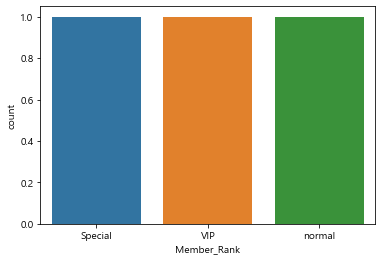

In [67]:
# 3. 앞서 계산된 'Member_Rank'에서 'VIP'고객들의 특성을 파악하고 한다.
#     'VIP'고객들만 추출하여, 'Channel'(유입경로)에 따른 'Total_Amount'(총금액)의 평균을 시각화 / 합 시각화

cond = df1['Member_Rank']=='VIP'

cond2 = df1.loc[cond]

p1 = df1.pivot_table(index = df1['Member_Rank'], values='Total_Amount', aggfunc='sum').reset_index()
p1


sns.countplot(x="Member_Rank", data=p1)
plt.show()

In [68]:
cond1 = (df1['Member_Rank'] == 'VIP')

p1 = df1.loc[cond1].pivot_table(index='Channel', values='Total_Amount', aggfunc= ['mean', 'sum']).reset_index()


In [69]:
p1.columns = p1.columns.droplevel(1)

In [70]:
p1

,Channel,mean,sum
0,대형마트A,6.657713e+06,6637739400
1,대형마트C,6.534000e+06,52272000
2,대형마트E,6.697143e+06,3100777200
3,대형마트H,6.498000e+06,506844000
4,영업방판,6.731221e+06,43739475300
5,자체홈페이지,6.452250e+06,154854000
6,재계약,6.354000e+06,6354000
7,전단홍보,6.794096e+06,1698524100
8,전문매장H,6.638545e+06,2144250000
9,전문매장Z,6.602187e+06,1340244000


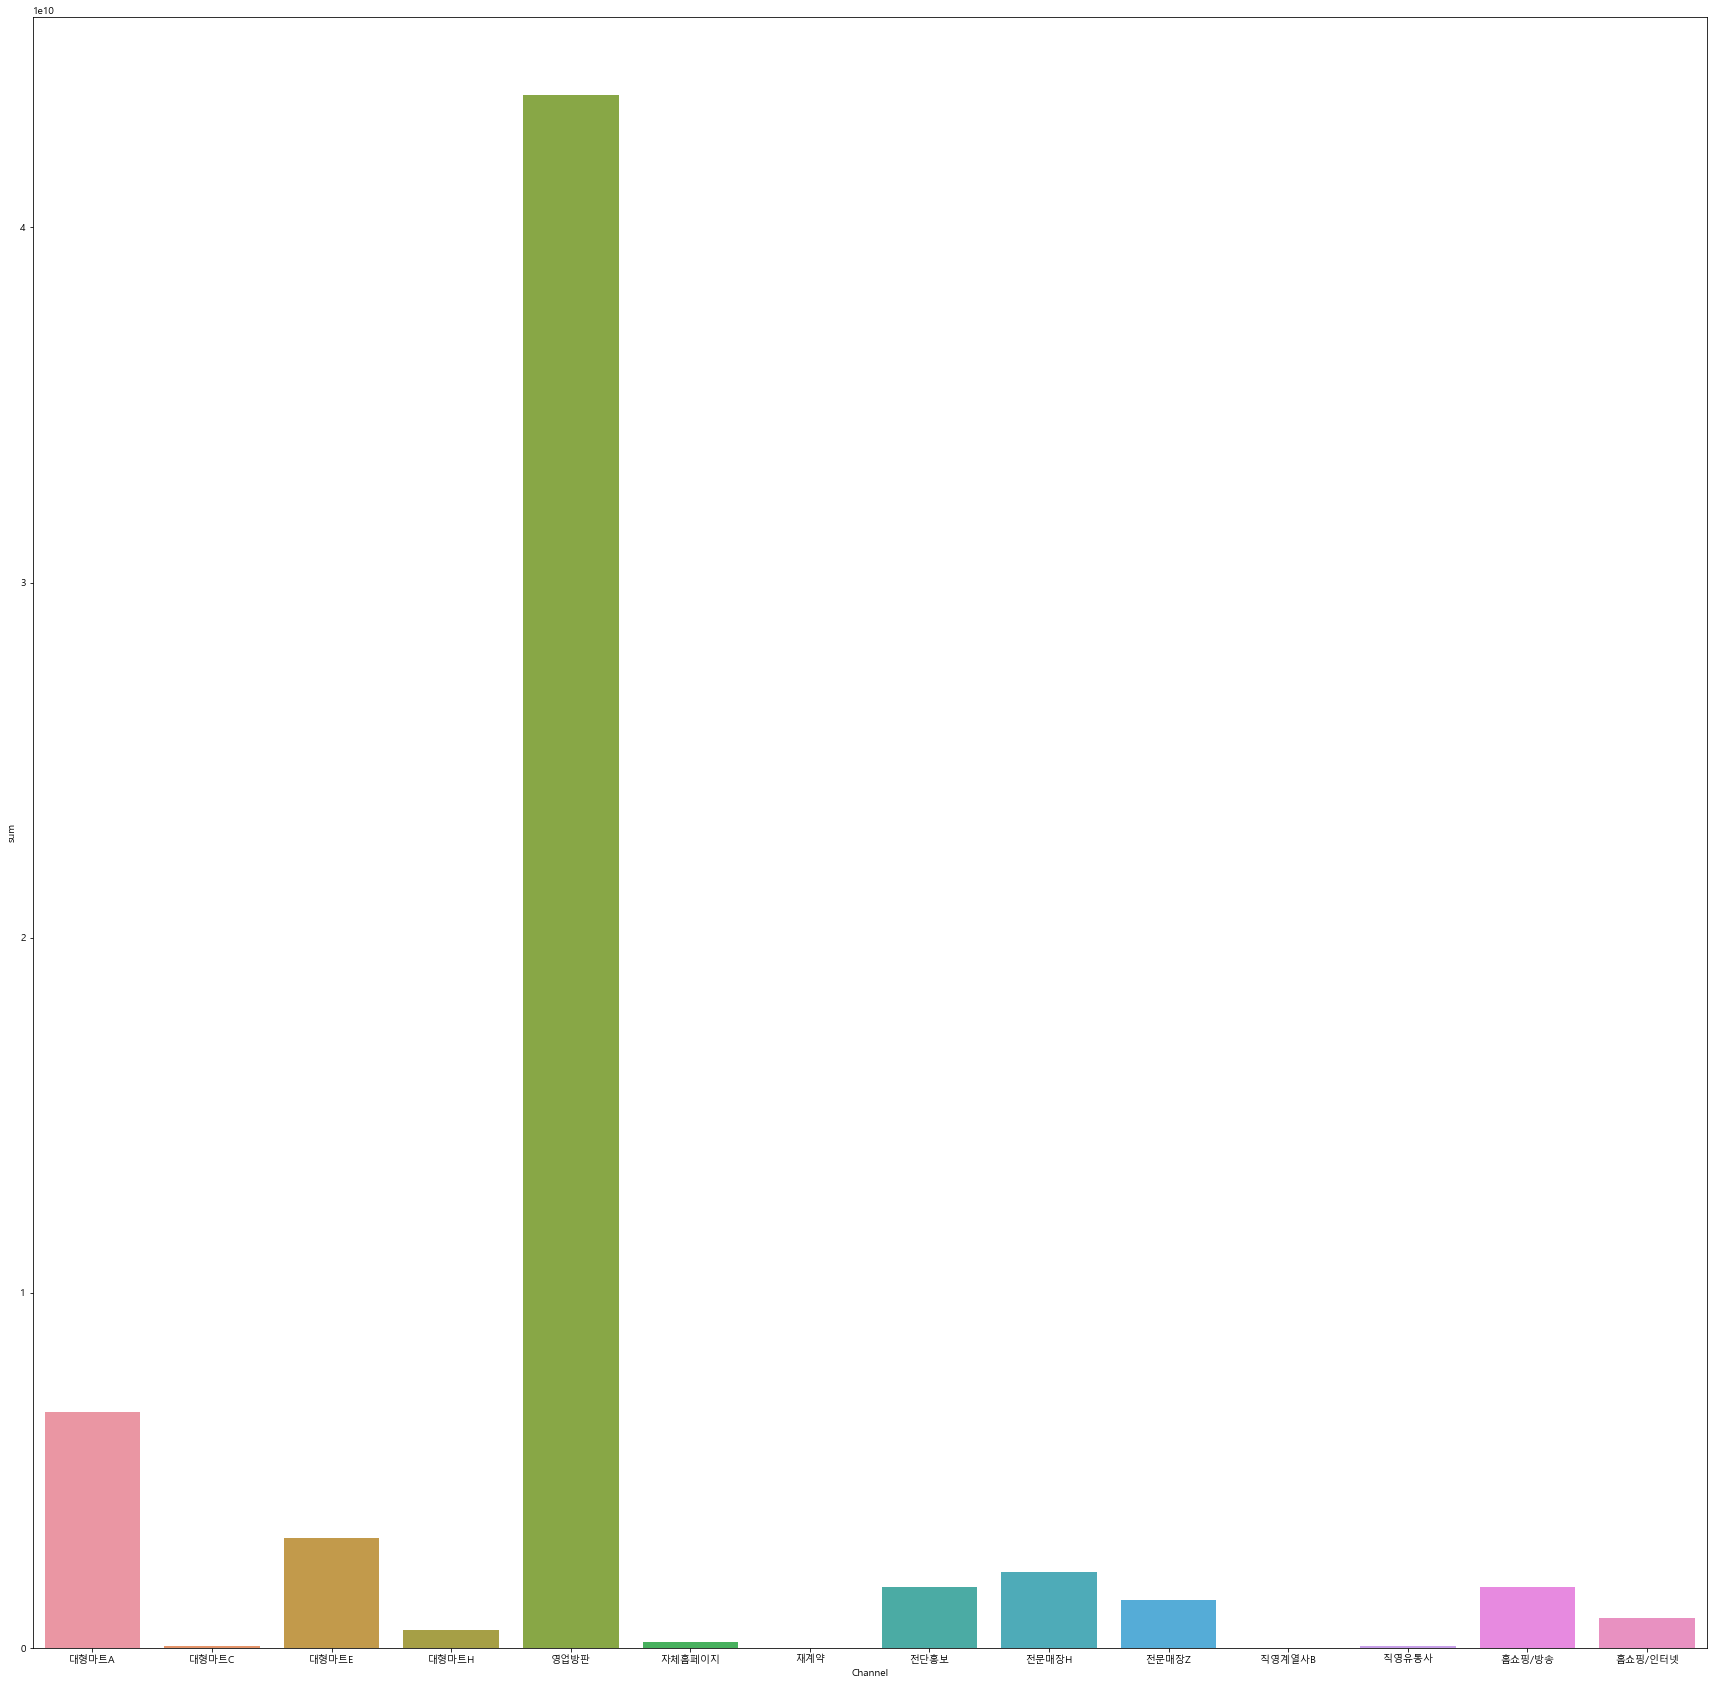

In [71]:
plt.figure(figsize=(30, 30))
# plt.twiny()
sns.barplot(data=p1, x='Channel', y='mean')
sns.barplot(data=p1, x='Channel', y='sum')
plt.show()

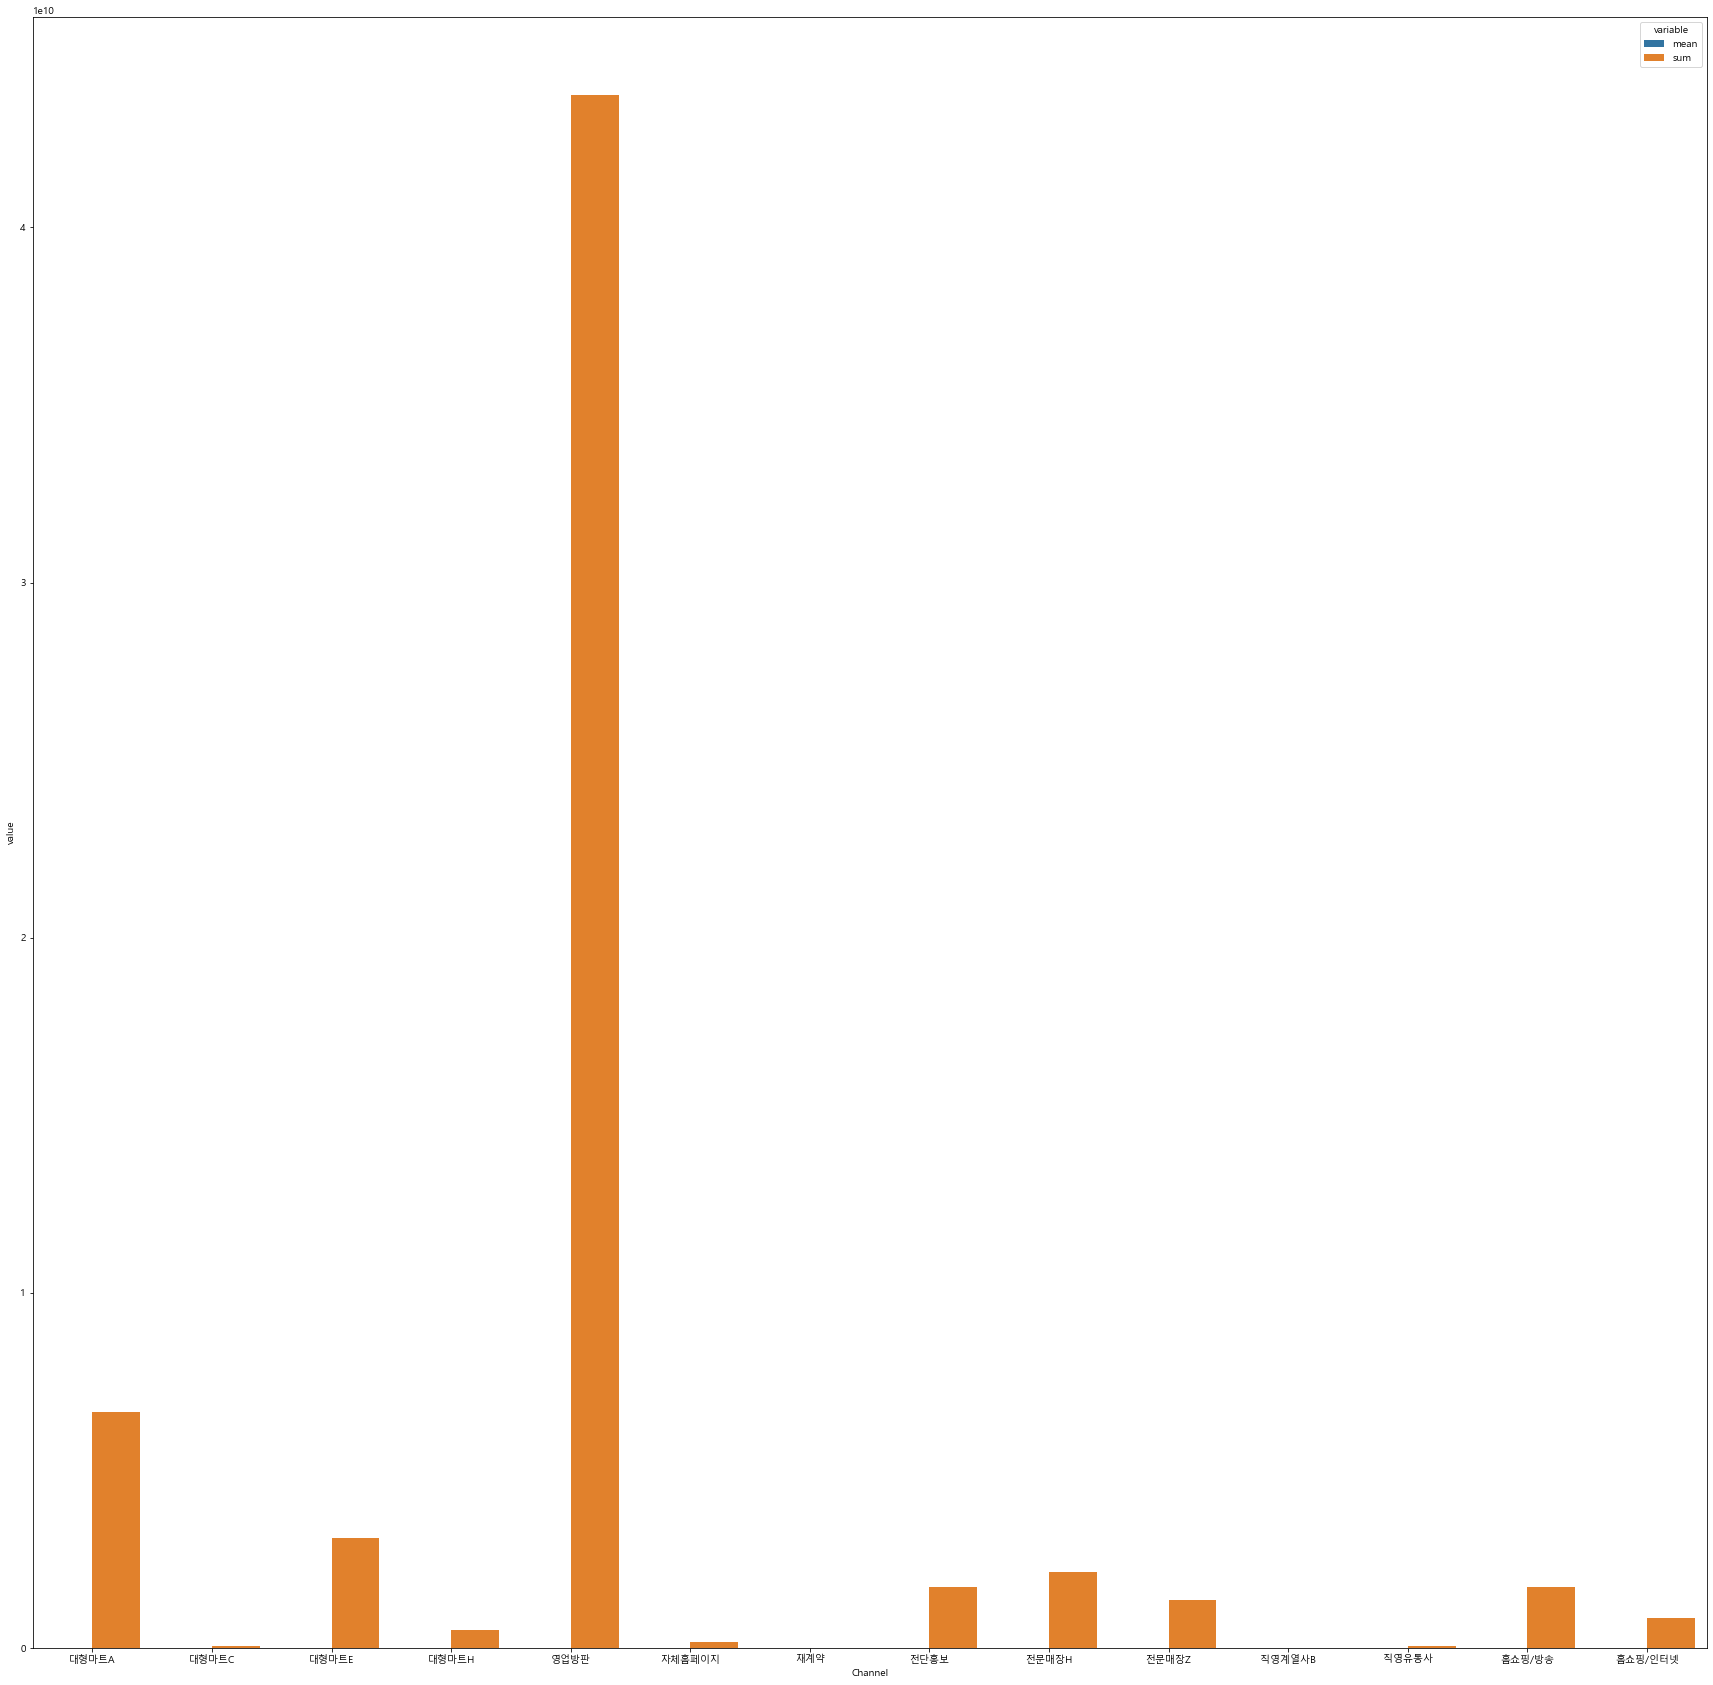

In [72]:
plt.figure(figsize=(30, 30))
sns.barplot(data= p1.melt(id_vars='Channel'), x='Channel', y='value', hue='variable')
plt.show()

<AxesSubplot:xlabel='value', ylabel='Channel'>

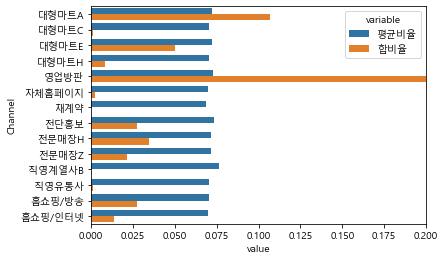

In [73]:
p1['평균비율']= p1['mean'] / p1['mean'].sum()
p1['합비율'] = p1['sum'] / p1['sum'].sum()

p1_ratio = p1[['Channel', '평균비율', '합비율']].melt(id_vars='Channel')
plt.xlim([0, 0.2])
sns.barplot(data= p1_ratio, y= 'Channel', x='value', hue='variable')

In [74]:
df1.pivot_table(index = 'Channel', columns='Member_Rank', values='Total_Amount', aggfunc='sum')

Member_Rank,Special,VIP,normal
Channel,,,
대형마트A,1.257088e+10,6.637739e+09,6.188818e+09
대형마트C,NaN,5.227200e+07,3.768034e+08
대형마트E,4.462740e+09,3.100777e+09,1.339240e+09
대형마트H,7.330140e+08,5.068440e+08,1.104840e+08
대형마트N,NaN,NaN,2.307348e+08
영업방판,6.101218e+10,4.373948e+10,3.502500e+10
자체홈페이지,4.525380e+08,1.548540e+08,9.863640e+07
재계약,NaN,6.354000e+06,1.766552e+09
전단홍보,1.388772e+09,1.698524e+09,3.191130e+08


In [75]:
### 4. 'VIP'고객들의 'Channel'(유입경로)에서 Total_Amount 값의 합이 가장 높은 상위 3개의 경로를 선택하여,
###     각 경로별 Total_Amount 값의 평균의 유의미한 차이가 있는지 가설검정 수행

cond = df1['Member_Rank']=='VIP'

df_vip = df1.loc[cond]
df_vip.sort_values(by='Total_Amount', ascending=False)['Channel'].value_counts().index.to_list()[:3]

stats.normaltest(df_vip['Total_Amount'])  #NormaltestResult(statistic=3682.234297413674, pvalue=0.0)
stats.kruskal(df_vip[df_vip['Channel']=='영업방판']['Total_Amount'],
             df_vip[df_vip['Channel']=='대형마트A']['Total_Amount'],
             df_vip[df_vip['Channel']=='대형마트E']['Total_Amount'])

KruskalResult(statistic=53.70859491044996, pvalue=2.1743367178113024e-12)

In [76]:
top3_list = p1.sort_values(by ='sum', ascending=False)['Channel'].head(3).values.tolist()

cond1 = df1['Channel'].isin(top3_list)
df1_top = df1.loc[cond1]

In [77]:
# 4-1 total_amount 정규설을 띄는가

# 귀무가설:total_amount 값이 정규분포와 차이가 없다.
# 대립가설 : total_amount 값이 정규분포와 차이가 없다.

stats.normaltest(df1_top['Total_Amount']) # pvalue=0.0

NormaltestResult(statistic=13082.036799757741, pvalue=0.0)

In [78]:
df1_top

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount,Member_Rank,Member_Rank_2
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000,Special,Normal
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000,Special,Normal
5,6,66165241,렌탈,프로모션계약,영업방판,2019-07-29,60,CMS,DES-3A,90900,...,경상도,계약확정,0,없음,여자,5.0,농협중앙회,5454000,normal,Normal
8,9,66758007,렌탈,일반계약,영업방판,2019-06-30,60,카드이체,DES-3A,102900,...,경상도,계약확정,0,없음,여자,2.0,롯데카드,6174000,Special,Normal
9,10,66756702,렌탈,프로모션계약,영업방판,2019-06-30,60,CMS,DES-1,105900,...,경상도,계약확정,0,없음,여자,1.0,신한은행,6354000,VIP,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51293,51295,66799369,렌탈,일반계약,대형마트A,2020-07-10,60,CMS,DES-1,96900,...,경기도,계약확정,0,없음,여자,1.0,국민은행,5814000,Special,Normal
51294,51296,66796007,렌탈,프로모션계약,대형마트A,2019-03-11,60,카드이체,DES-3A,90900,...,경기도,계약확정,0,없음,남자,NaN,BC카드,5454000,normal,Normal
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,경기도,계약확정,0,없음,남자,NaN,기업은행,5814000,Special,Normal
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,경기도,계약확정,0,없음,여자,8.0,새마을금고,5814000,Special,Normal


In [79]:
# 4-2 정규분포를 띄지 않는 연속형 데이터에 대해 3집단 간 평균 비교

# 귀무가설 : 세집단의 평균은 차이가 없다. (세집단 모두 평균이 같다고 볼 수 있다,)
# 대립가설 : 세집단의 평균은 차이가 있다.. (세집단 모두 평균이 같다고 볼 수 없다,)


stats.kruskal(df_vip[df_vip['Channel']=='영업방판']['Total_Amount'],
             df_vip[df_vip['Channel']=='대형마트A']['Total_Amount'],
             df_vip[df_vip['Channel']=='대형마트E']['Total_Amount'])



cond1 = (df1_top['Channel'] == top3_list[0])
cond2 = (df1_top['Channel'] == top3_list[1])
cond3 = (df1_top['Channel'] == top3_list[2])

df1_top1 = df1_top.loc[cond1]
df1_top2 = df1_top.loc[cond2]
df1_top3 = df1_top.loc[cond3]

stats.kruskal(df1_top1['Total_Amount'], df1_top2['Total_Amount'], df1_top3['Total_Amount']) #  pvalue=2.978751148361835e-32)

KruskalResult(statistic=145.18243768172138, pvalue=2.978751148361835e-32)

In [80]:

df2 =df1.pivot_table(index = 'Channel', columns='Member_Rank', 
                values='Total_Amount', aggfunc='mean').reset_index().sort_values(by='VIP',
                                                    ascending=False)
df2
# df2.iloc[:3]['Channel']
# stats.kruskal(df2.iloc[0], df2.iloc[1], df2.iloc[2])

Member_Rank,Channel,Special,VIP,normal
12,직영계열사B,NaN,7.074000e+06,4.995200e+06
8,전단홍보,5.835176e+06,6.794096e+06,4.432125e+06
5,영업방판,5.862610e+06,6.731221e+06,5.104197e+06
2,대형마트E,5.833647e+06,6.697143e+06,4.978586e+06
0,대형마트A,5.876987e+06,6.657713e+06,3.894788e+06
9,전문매장H,5.815440e+06,6.638545e+06,2.162637e+06
10,전문매장Z,5.814102e+06,6.602187e+06,5.209932e+06
1,대형마트C,NaN,6.534000e+06,3.394625e+06
14,홈쇼핑/방송,5.815253e+06,6.518552e+06,4.919387e+06
13,직영유통사,5.814000e+06,6.507000e+06,4.176493e+06


In [81]:
df1.head(2)

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount,Member_Rank,Member_Rank_2
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000,Special,Normal
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000,Special,Normal


(17400.408970458087,
 0.0,
 10,
 array([[16129.65215103,  3707.92811056,   857.73659383,   134.78129081,
           265.44082961,    49.46102415],
        [ 7053.71924524,  1621.52807937,   375.10003704,    58.94171654,
           116.08093409,    21.62998772],
        [15949.62860373,  3666.54381006,   848.16336914,   133.27699265,
           262.47823629,    48.90898813]]))

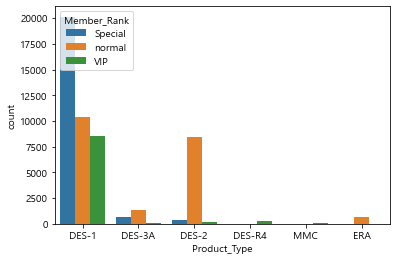

In [82]:
# 5. 'Member_Rank'고객의 등급에 따라 사용하는 'Product_Type'제품군이 달라지는지 확인해 보고자 한다.
#     - 고객의 등급과 제품군의 빈도수를 나타나는 그래프를 시각화
#     - 고객의 등급과 제품군 간의 연관성이 있는지 가설검정을 수행

# df1.pivot_table(index = 'Member_Rank', columns ='Product_Type')

product_list = df1['Product_Type'].value_counts().index.to_list()

sns.countplot(x="Product_Type", hue="Member_Rank", data=df1)


new_df = pd.crosstab(df1['Member_Rank'], df1['Product_Type'])
stats.chi2_contingency(new_df)

In [83]:
df1_table = pd.crosstab(df1['Member_Rank'], df1['Product_Type'])
stats.chi2_contingency(df1_table)

(17400.408970458087,
 0.0,
 10,
 array([[16129.65215103,  3707.92811056,   857.73659383,   134.78129081,
           265.44082961,    49.46102415],
        [ 7053.71924524,  1621.52807937,   375.10003704,    58.94171654,
           116.08093409,    21.62998772],
        [15949.62860373,  3666.54381006,   848.16336914,   133.27699265,
           262.47823629,    48.90898813]]))

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          51301 non-null  int64  
 1   Member_ID      51301 non-null  int64  
 2   Sales_Type     51301 non-null  object 
 3   Contract_Type  51301 non-null  object 
 4   Channel        51301 non-null  object 
 5   Datetime       51301 non-null  object 
 6   Term           51301 non-null  int64  
 7   Payment_Type   51301 non-null  object 
 8   Product_Type   51301 non-null  object 
 9   Amount_Month   51301 non-null  int64  
 10  Customer_Type  51299 non-null  object 
 11  Age            44329 non-null  float64
 12  Address1       51299 non-null  object 
 13  Address2       51299 non-null  object 
 14  State          51301 non-null  object 
 15  Overdue_count  51301 non-null  int64  
 16  Overdue_Type   51301 non-null  object 
 17  Gender         51301 non-null  object 
 18  Credit

In [85]:
# 6. 'Member_Rank'고객 등급에서 'Special'고객들의 특성을 파악하고자 한다.
#     - 'Datetime'계약일자를 이용하여, 가장 유입이(빈도수) 많이 발생한 '월'을 확인
#     - 2019년도 / 2020년도 각각 확인

cond1 = (df1['Member_Rank'] == 'special')

df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1['월'] = df1['Datetime'].dt.month
df1['년'] = df1['Datetime'].dt.year
df1['일'] = df1['Datetime'].dt.day
df1['년'].value_counts()

cond1 =  (df1['년']==2019)
cond2 = (df1['년']==2020)

month_list =  df1['월'].value_counts().index.to_list()[0]
year_list =  df1['년'].value_counts().index.to_list()[0]

top_month = df1.loc[cond1]['월'] == month_list
top_year = df1.loc[cond1]['월'] == year_list

In [86]:
df1['Datetime_dt'] = pd.to_datetime(df1['Datetime'])
df1['Year'] = df1['Datetime_dt'].dt.year
df1['Month'] = df1['Datetime_dt'].dt.month

In [87]:
cond1 = (df1['Member_Rank'] == 'Special')
df1_special = df1.loc[cond1]

df1_special['Count'] = 1
df1_special.pivot_table(index='Month', values='Count',columns='Year', aggfunc='sum')

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_15604\424976726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_special['Count'] = 1


Year,2019,2020
Month,,
1,1779.0,785.0
2,2740.0,835.0
3,2014.0,704.0
4,1496.0,553.0
5,1212.0,383.0
6,1118.0,359.0
7,1429.0,563.0
8,969.0,105.0
9,958.0,NaN


In [88]:
# 7. 'Product_Type'제품군 별 연도에 따른 'Total_Amount'총금액의 증감율을 계산하시오.


p1 = df1.pivot_table(index='Product_Type', columns='Year', values='Total_Amount', aggfunc='sum')
p1
p1['증감율'] = ((p1[2020] - p1[2019])/p1[2019]) * 100
p1

Year,2019,2020,증감율
Product_Type,,,
DES-1,167173962120,42612206976,-74.510261
DES-2,35856775800,8887944960,-75.212649
DES-3A,9361251360,2384535600,-74.527598
DES-R4,2007975600,506232000,-74.788937
ERA,2454835500,552672900,-77.486357
MMC,684063900,202562100,-70.388424


In [89]:
print(df1['Credit_Rank'].median)

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        9.0
1        2.0
2        8.0
3        5.0
4        8.0
        ... 
51296    NaN
51297    8.0
51298    1.0
51299    2.0
51300    8.0
Name: Credit_Rank, Length: 51301, dtype: float64>


In [90]:
df1['Credit_Rank'].value_counts

<bound method IndexOpsMixin.value_counts of 0        9.0
1        2.0
2        8.0
3        5.0
4        8.0
        ... 
51296    NaN
51297    8.0
51298    1.0
51299    2.0
51300    8.0
Name: Credit_Rank, Length: 51301, dtype: float64>

In [91]:
df1['Credit_Rank'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        9.0
1        2.0
2        8.0
3        5.0
4        8.0
        ... 
51296    NaN
51297    8.0
51298    1.0
51299    2.0
51300    8.0
Name: Credit_Rank, Length: 51301, dtype: float64>

In [92]:
# 8. Credit_Rank '신용등급'을 예측하는 회귀모델을 만들고자 한다.
#     아래의 조건을 맞춰 회귀모델을 구성하시오.
#         - X : Age / Amount_Month/ Term / Gender / Product_Type
#         - Y : Credit_Rank
#         - 숫자 데이터 : 결측처리 + Standard Scaling
#         - 문자 데이터 : 결측처리 + One Hot Encoding
#         - 교차 검증 3회 / DecisionTreeRegressor / param_grid ={}
#         - r2_score(from sklearn.metrics import r2_score)
#         - r2_socre(Y_train, Y_train_pred_ / r2_score(Y_test, Y_test_pred)
X= df1[['Age' , 'Amount_Month', 'Term', 'Gender','Product_Type']]
Y= df1['Credit_Rank'].fillna(df1['Credit_Rank'].median())

    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# print(f'사이즈의 크기 : {X_train.shape}')
# print(f'사이즈의 크기 : {X_test.shape}')
# print(f'사이즈의 크기 : {Y_train.shape}')
# print(f'사이즈의 크기 : {Y_test.shape}')


In [93]:
df1['Credit_Rank'].median()

3.0

In [94]:
#학습데이터와 검증데이터 분할
from sklearn.model_selection import train_test_split

#특성공학과 학습이 수행될 파이프라인 굿ㅇ
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#특성공학
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#학습 알고리즘
from sklearn.tree import DecisionTreeRegressor

#교차검증
from sklearn.model_selection import GridSearchCV

#평가
from sklearn.metrics import r2_score


In [95]:
X = df1[['Age', 'Amount_Month', 'Term', 'Gender', 'Product_Type']]
Y = df1['Credit_Rank'].fillna(df1['Credit_Rank'].median())

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [97]:

numeric_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist() # 문자데이터만 뽑기

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                            (category_pipe, category_list))

model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Amount_Month',
                                                   'Term']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'Product_Type'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [98]:
# 특성공학 + 학습
#  숫자는 숫자끼리 문자는 문자끼리 처리가 디도록 파이프를 구성
# 문자가 처리되는 process 구축 (1. 최빈값으로 결측 처리 -> 2. 인코딩)

#         - 숫자 데이터 : 결측처리 + Standard Scaling
#         - 문자 데이터 : 결측처리 + One Hot Encoding
#         - 교차 검증 3회 / DecisionTreeRegressor / param_grid ={}
#         - r2_score(from sklearn.metrics import r2_score)
#         - r2_socre(Y_train, Y_train_pred_ / r2_score(Y_test, Y_test_pred)
from imblearn.pipeline import make_pipeline


numeric_pipe = make_pipeline(SimpleImputer(strategy='median'),
                            StandardScaler())
                                               
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder())
numeric_list = X.describe().columns.tolist() # describe는 integer data만 나오기때문에 column을 따로뽑을수있다.

category_list = X.describe(include = 'object').columns.tolist() # 문자데이터만 뽑기


preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                             (category_pipe,category_list))
model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe.fit(X_train, Y_train)
preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),(category_pipe,category_list))
model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Amount_Month',
                                                   'Term']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'Product_Type'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [99]:
grid_model = GridSearchCV(model_pipe, cv=3,
                         param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

In [100]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [101]:
round(r2_score(Y_train, y_train_pred), 2) * 100

13.0

In [102]:
r2_score(Y_test, y_test_pred)
# round(r2_score(Y_test, y_test_pred), 2) * 100

-0.07301690023969498

In [103]:
numeric_list = X.describe().columns.tolist() # describe는 integer data만 나오기때문에 column을 따로뽑을수있다.
numeric_list

['Age', 'Amount_Month', 'Term']

In [104]:
category_list

['Gender', 'Product_Type']

In [105]:
grid_model = GridSearchCV(model_pipe, cv=3, 
            param_grid = {'DecisionTreeRegressor'}, 
                        scoring='r2',
                        n_jobs = -1)


In [106]:
grid_model.fit(X_train,Y_train)

TypeError: Parameter grid is not a dict ('DecisionTreeRegressor')

In [ ]:
# 9. 'Product_Type' 별 계약건수 대비 총금액(Total_Amount)을 나눈 값을 계산하시오.

df1.pivot_table(index='Product_Type', values='Total_Amount', aggfunc='mean')
df1['Product_Type'].value_counts()

In [ ]:
df1['Count'] = 1
p1= df1.pivot_table(index='Product_Type', values=['Total_Amount', 'Count'], aggfunc='sum')

p1['Mean'] = p1['Total_Amount'] / p1['Count']
p1['Mean']

In [ ]:
df1.pivot_table(index='Product_Type', values='Total_Amount', aggfunc='mean')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def evaluation_reg_fun1(model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    print('학습성능 (R)', r2_score(Y_train, Y_train_pred))
    print('일반화 성능 (R)', r2_score(Y_test, Y_test_pred))
    print('학습성능 (MSE)', mean_squared_error(Y_train, Y_train_pred))
    print('일반화 성능 (MSE)', mean_squared_error(Y_test, Y_test_pred))

In [ ]:
evaluation_reg_fun1(best_model)

In [ ]:
df1

In [ ]:
df1['Target']= df1['State'].replace({'계약확정':0, '기간만료':0, 
                                     '해약확정':1, '해약진행중':1})
df1['Target'].value_counts()


In [ ]:
Y = df1['Target']
X = df1[['Age', 'Term', 'Amount_Month', 'Gender', 'Product_Type']]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
under_sampler.fit(X, Y)
# under_sampler.value_counts()

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
under_sampler = TomekLinks()
under_sampler.fit(df_clean[['Age','Term']], df_clean['Target'])

X_under, Y_under = under_sampler.fit_resample(df_clean[['Age','Term']], 
                                              df_clean['Target'])
Y_under.value_counts()


In [ ]:
from imblearn.over_sampling import SMOTE

over_sampler = SMOTE()
under_sampler.fit(df_clean[['Age','Term']], df_clean['Target'])

X_over, Y_over = under_sampler.fit_resample(df_clean[['Age','Term']], 
                                              df_clean['Target'])
Y_over.value_counts()


In [ ]:
make_pipeline(preprocessing_pipe, SMOTE(), DecisionTreeRegressor())